# Exploratory Data Analysis (EDA)

#### Data from: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

In [1]:
# library imports
import pandas as pd
import opendatasets
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# initiate tqdm for pandas.apply() functions
tqdm_notebook.pandas()

In [2]:
# expand notebook display options for dataframes
pd.set_option('display.max_colwidth', 200)
pd.options.display.max_columns = 999
pd.options.display.max_rows = 300

## Dataset Import 

In [3]:
# option to use opendatasets to directly retrieve the dataset from Kaggle
kaggle_url = 'https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews'
opendatasets.download(kaggle_url)

In [4]:
dataset = pd.read_csv('dataset\\Womens Clothing E-Commerce Reviews.csv')

## Word Clouds

In [5]:
# define subsets of the dataset pertaining to all 5 and 1-star reviews
df_best_reviews = dataset.loc[(~dataset['Review Text'].isna()) & (dataset['Rating']==5)]
df_worst_reviews = dataset.loc[(~dataset['Review Text'].isna()) & (dataset['Rating']==1)]

In [6]:
def generate_wordcloud(text):
    """
    Generate word cloud images
    """
    wordcloud = WordCloud(collocations=False, 
                          background_color="black",
                          max_words=200).generate(text)
    
    # set the figure size
    plt.figure(figsize=[8,10])

    # plot the wordcloud
    plt.imshow(wordcloud, interpolation="bilinear")

    # remove plot axes
    plt.axis("off")

Word cloud: 5-star reviews:


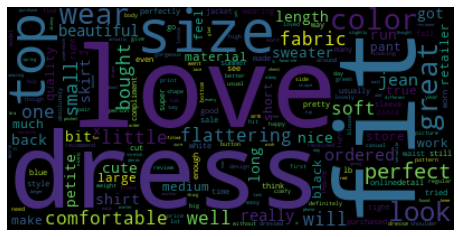

In [7]:
text_best_reviews = " ".join(df_best_reviews['Review Text'])
print('Word cloud: 5-star reviews:')
generate_wordcloud(text_best_reviews)

Word cloud: 1-star reviews:


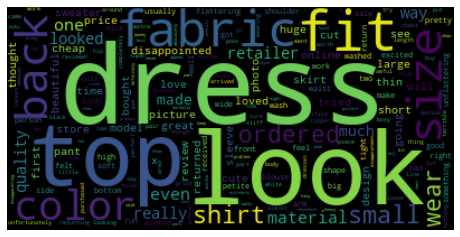

In [8]:
text_worst_reviews = " ".join(df_worst_reviews['Review Text'])
print('Word cloud: 1-star reviews:')
generate_wordcloud(text_worst_reviews)

## Charts

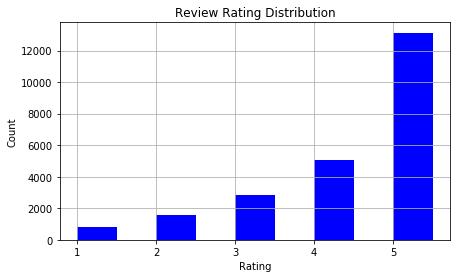

In [9]:
ax1 = dataset['Rating'].plot(kind='hist', 
                             color='blue', 
                             grid=True, 
                             bins=[1,1.5,2,2.5,3,3.5,4,4.5,5,5.5], 
                             title='Review Rating Distribution',
                             figsize=(7,4))
ax1.set_xlabel("Rating")
ax1.set_ylabel("Count")
ax1.set_xticks([1,2,3,4,5], minor=False)

# set font size  
plt.rcParams['font.size'] = '10'

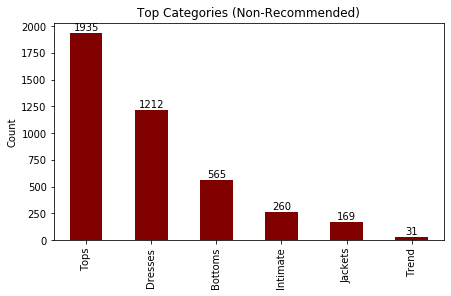

In [10]:
# define a subset of not-recommended products
df_not_recommended = dataset[dataset['Recommended IND']==0]

ax2 = df_not_recommended['Department Name'].value_counts().plot(kind='bar', 
                                                                color='maroon',
                                                                title='Top Categories (Non-Recommended)',
                                                                figsize=(7,4))
ax2.set_ylabel("Count")

# place labels above each bar
ax2_labels = df_not_recommended['Department Name'].value_counts().to_list()
rects = ax2.patches
labels = [ax2_labels[i] for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax2.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

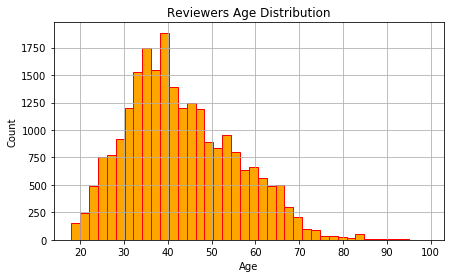

In [11]:
ax3 = dataset['Age'].plot(kind='hist', 
                          bins=40, 
                          title='Reviewers Age Distribution', 
                          color='orange', 
                          edgecolor='red',
                          linewidth=1,
                          grid=True,
                          figsize=(7,4))
ax3.set_xlabel("Age")
ax3.set_ylabel("Count")
plt.show()

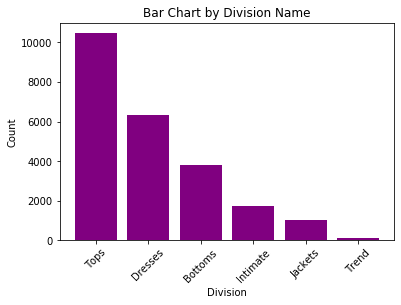

In [12]:
plt.bar(dataset['Department Name'].value_counts().index, 
        dataset['Department Name'].value_counts().values,
        color='purple')
plt.xticks(rotation=45)
plt.title("Bar Chart by Division Name")
plt.xlabel("Division")
plt.ylabel("Count")
plt.show()

## N-gram Frequency

In [13]:
# define a corpus of all review texts
review_corpus = dataset[~dataset['Review Text'].isna()]['Review Text']
review_corpus = " ".join(review_corpus.values)

In [14]:
def ngrams(text, n):
     return zip(*[text[i:] for i in range(n)])

In [15]:
def display_ngram_frequency(corpus, n, display):
    """
    Generate a DataFrame of n-grams and their frequencies
    """
    ngram_counts = Counter(ngrams(corpus.split(), n))
    most_commmon = ngram_counts.most_common(display)

    ngram = []
    count = []
    for i in range(0,len(most_commmon)):
        ngram.append(" ".join(most_commmon[i][0]))
        count.append(most_commmon[i][1])

    if n > 3:
        col = f"{n}-gram"
    if n == 3:
        col = 'Tri-gram'
    if n == 2:
        col = 'Bi-gram'

    return pd.DataFrame(zip(ngram, count), columns=[col, "Count"])

In [16]:
display_ngram_frequency(review_corpus, n=5, display=6)

,5-gram,Count
0,can be dressed up or,209
1,be dressed up or down.,139
2,I wanted to love this,106
3,the fabric is soft and,99
4,i can't wait to wear,96
5,when i tried it on,73


In [17]:
display_ngram_frequency(review_corpus, n=6, display=5)

,6-gram,Count
0,can be dressed up or down.,106
1,it can be dressed up or,63
2,I fell in love with this,52
3,I really wanted to love this,46
4,you can dress it up or,44


## Insights

This simple EDA analysis observes customer data from a womens clothing e-commerce business. <br>
Overall, products are well-liked by customers and receive primarily positive 4 and 5-star ratings. <br>
<br>
Pain points were looked into by analyzing a subsest of 1-star and non-recommended reviews. <br>
Customer unhappiness arises from 2 main factors: poorly fitting items and cheap fabrics. <br>
Most complaints are for tops and dresses. <br>
<br>
The company should improve its sizing guides and length specifications. <br>
It should exclude tops/dresses that are made with cheap materials, which may be too thin, old-fashioned looking, <br>
and do not wash well.